# MSc Thesis Applied Data Science - Analysis

## Initialisation

In [ ]:
# Import modules
import pandas as pd
import numpy as np


Mounted at /content/drive


In [ ]:
# Load data
case_01_twitter = '/path/to/twitter/data/case/1'
case_01_telegram = '/path/to/telegram/data/case/1'
case_01_target_date = '2021-07-15'

case_02_twitter = '/path/to/twitter/data/case/2'
case_02_telegram = '/path/to/telegram/data/case/2'
case_02_target_date = '2022-01-05'

case_03_twitter = '/path/to/twitter/data/case/3'
case_03_telegram = '/path/to/telegram/data/case/3'
case_03_target_date = '2022-07-06'

case_04_twitter = '/path/to/twitter/data/case/4'
case_04_telegram = '/path/to/telegram/data/case/4'
case_04_target_date = '2022-06-15'

case_05_twitter = '/path/to/twitter/data/case/5'
case_05_telegram = '/path/to/telegram/data/case/5'
case_05_target_date = '2021-11-02'

case_06_twitter = '/path/to/twitter/data/case/6'
case_06_telegram = '/path/to/telegram/data/case/6'
case_06_target_date = '2021-11-21'

case_07_twitter = '/path/to/twitter/data/case/7'
case_07_telegram = '/path/to/telegram/data/case/7'
case_07_target_date = '2021-01-10'

case_08_twitter = '/path/to/twitter/data/case/8'
case_08_telegram = '/path/to/telegram/data/case/8'
case_08_target_date = '2021-05-15'

# Define Function for Calculating and Plotting Simple Moving Average

In [ ]:
def sma_plots(df, target_date, case, x):
    df['date'] = pd.to_datetime(df['date'])
    from collections import defaultdict
    label_counts_by_date = defaultdict(lambda: [0, 1, 2, 3, 4])

    for entry in range(len(df)):
        date = df["date"].iloc[entry]
        label = df["predicted_label"].iloc[entry]
        label_counts_by_date[date][label] += 1
    dates = sorted(label_counts_by_date.keys())
    label_counts = {0: [], 1: [], 2: [], 3: [], 4: []}

    for date in dates:
        counts = label_counts_by_date[date]
        for label in range(5):  # Assuming labels are from 0 to 4
            label_counts[label].append(counts[label])
    label0_counts = label_counts[0]
    label1_counts = label_counts[1]
    label2_counts = label_counts[2]
    label3_counts = label_counts[3]
    label4_counts = label_counts[4]
    label1_counts = [num - 1 for num in label1_counts]
    label2_counts = [num - 2 for num in label2_counts]
    label3_counts = [num - 3 for num in label3_counts]
    label4_counts = [num - 4 for num in label4_counts]


    import matplotlib.pyplot as plt
    from datetime import datetime

    dates_dt = [date for date in dates]

    # Function to calculate Simple Moving Average (SMA)
    def calculate_sma(data, window_size):
        sma = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
        return sma

    # Define window size for SMA
    window_size = 7  # Example: 7 days window

    # Calculate SMAs for each label
    sma_label0 = calculate_sma(label0_counts, window_size)
    sma_label1 = calculate_sma(label1_counts, window_size)
    sma_label2 = calculate_sma(label2_counts, window_size)
    sma_label3 = calculate_sma(label3_counts, window_size)
    sma_label4 = calculate_sma(label4_counts, window_size)

    plt.figure(figsize=(12, 16))

    # Plot label 0
    plt.subplot(511)
    plt.plot(dates_dt[window_size-1:], sma_label0, marker='o', linestyle='-', color='lightgreen',alpha=0.8, label='Label 0 (Niets) (SMA)')
    plt.plot(dates_dt, label0_counts, marker='o', linestyle='-', color='green',  label='Label 0 (Niets) (Raw)')
    plt.axvline(x=datetime.strptime(target_date, "%Y-%m-%d"), color='red', linestyle='--', linewidth=1, label=f'Vertical Line at {target_date}')
    plt.title('Simple Moving Average (SMA) - Label 0')
    plt.xlabel('Date')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid(True)

    # Plot label 1
    plt.subplot(512)
    plt.plot(dates_dt[window_size-1:], sma_label1, marker='o', linestyle='-', color='#FFE05D',alpha=0.8, label='Label 1 (Dehumanising) (SMA)')
    plt.plot(dates_dt, label1_counts, marker='o', linestyle='-', color='#E8BB00',  label='Label 1 (Dehumanising) (Raw)')
    plt.axvline(x=datetime.strptime(target_date, "%Y-%m-%d"), color='red', linestyle='--', linewidth=1, label=f'Vertical Line at {target_date}')
    plt.title('Simple Moving Average (SMA) - Label 1')
    plt.xlabel('Date')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid(True)

    # Plot label 2
    plt.subplot(513)
    plt.plot(dates_dt[window_size-1:], sma_label2, marker='o', linestyle='-', color='#FFA553',alpha=0.8, label='Label 2 (Demonising) (SMA)')
    plt.plot(dates_dt, label2_counts, marker='o', linestyle='-', color='#FF7A00',  label='Label 2 (Demonising) (Raw)')
    plt.axvline(x=datetime.strptime(target_date, "%Y-%m-%d"), color='red', linestyle='--', linewidth=1,label=f'Vertical Line at {target_date}')
    plt.title('Simple Moving Average (SMA) - Label 2')
    plt.xlabel('Date')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid(True)

    # Plot label 3
    plt.subplot(514)
    plt.plot(dates_dt[window_size-1:], sma_label3, marker='o', linestyle='-', color='lightcoral',alpha=0.8, label='Label 3 (Violent Threat) (SMA)')
    plt.plot(dates_dt, label3_counts, marker='o', linestyle='-', color='red',  label='Label 3 (Violent Threat) (Raw)')
    plt.axvline(x=datetime.strptime(target_date, "%Y-%m-%d"), color='red', linestyle='--', linewidth=1, label=f'Vertical Line at {target_date}')
    plt.title('Simple Moving Average (SMA) - Label 3')
    plt.xlabel('Date')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid(True)

    # Plot label 4
    plt.subplot(515)
    plt.plot(dates_dt[window_size-1:], sma_label4, marker='o', linestyle='-', color='indianred', alpha=0.8,  label='Label 4 (Death Threat) (SMA)')
    plt.plot(dates_dt, label4_counts, marker='o', linestyle='-', color='darkred',label='Label 4 (Death Threat) (Raw)')
    plt.axvline(x=datetime.strptime(target_date, "%Y-%m-%d"), color='red', linestyle='--', linewidth=1, label=f'Vertical Line at {target_date}')
    plt.title('Simple Moving Average (SMA) - Label 4')
    plt.xlabel('Date')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    plt.savefig(f'/content/drive/MyDrive/ThesisMScADS/plots/{x}_{case}.png')




In [ ]:
def case_study(tel, twit, target_date, case):
    print(f'The following plots are from case {case}. \n The target date is {target_date}')
    tel = pd.read_csv(tel)
    print( 'tel values: ', tel['predicted_label'].value_counts(), 'total: ', len( tel['predicted_label']))
    twit = pd.read_csv(twit)
    print( 'twit values: ', twit['predicted_label'].value_counts(), 'total: ', len( twit['predicted_label']))
   # concat = pd.concat([tel, twit])
    #print( 'concat values: ', concat['predicted_label'].value_counts(), 'total: ', len( concat['predicted_label']))
    print('TWITTER')
    print(f'first the distribution over time for case {case} on twitter')
    #line_plots(twit, target_date)
    print(f'second the sma plots over time for case {case} on twitter')
    sma_plots(twit, target_date, case, 'twit')

    print('TELEGRAM')
    print(f'first the distribution over time for case {case} on telegram')
    #line_plots(twit, target_date)
    print(f'second the sma plots over time for case {case} on telegram')
    sma_plots(tel, target_date, case, 'tel')

    #print('CONCAT')
    #print(f'first the distribution over time for case {case} on concat')
    #line_plots(concat, target_date)
    #print(f'second the sma plots over time for case {case} on concat')
   #sma_plots(concat, target_date, case, 'conc')


## Case 1

The following plots are from case 1. 
 The target date is 2021-07-15
tel values:  predicted_label
0    194
1      7
2      3
4      2
Name: count, dtype: int64 total:  206
twit values:  predicted_label
0    37985
2      898
1      484
3      272
4      209
Name: count, dtype: int64 total:  39848
TWITTER
first the distribution over time for case 1 on twitter
second the sma plots over time for case 1 on twitter


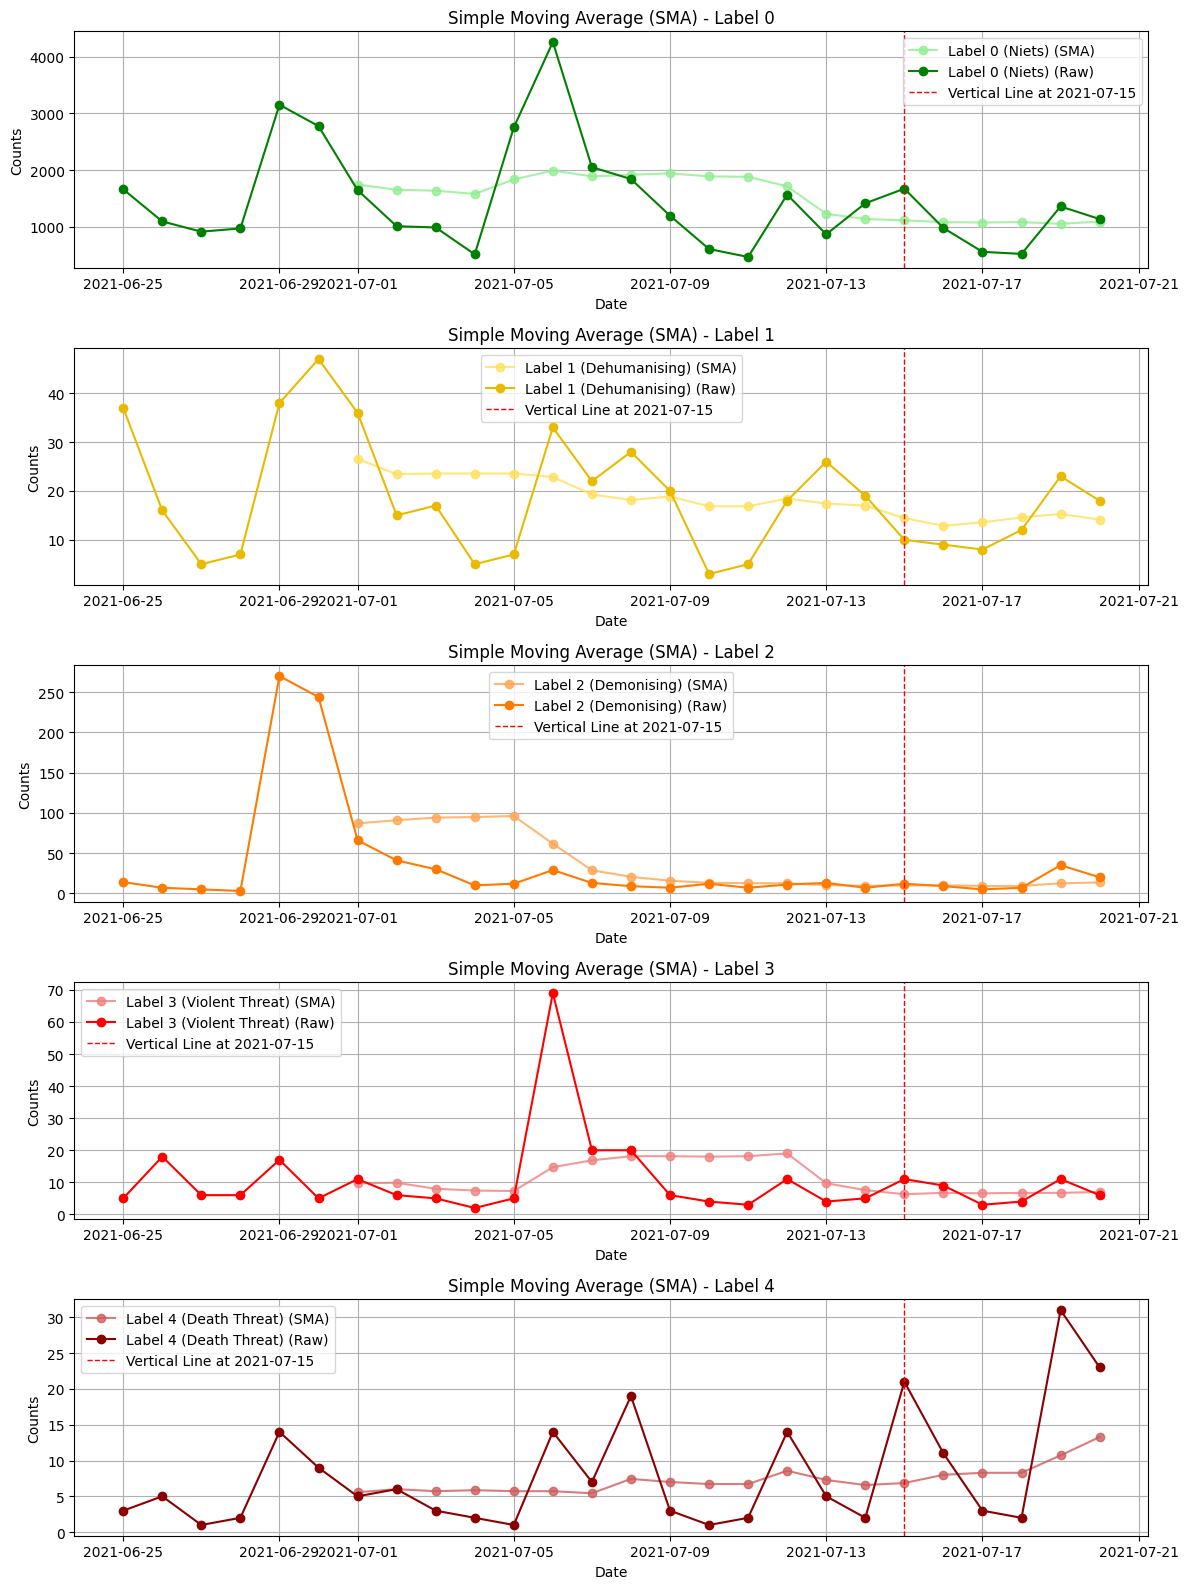

TELEGRAM
first the distribution over time for case 1 on telegram
second the sma plots over time for case 1 on telegram


<Figure size 640x480 with 0 Axes>

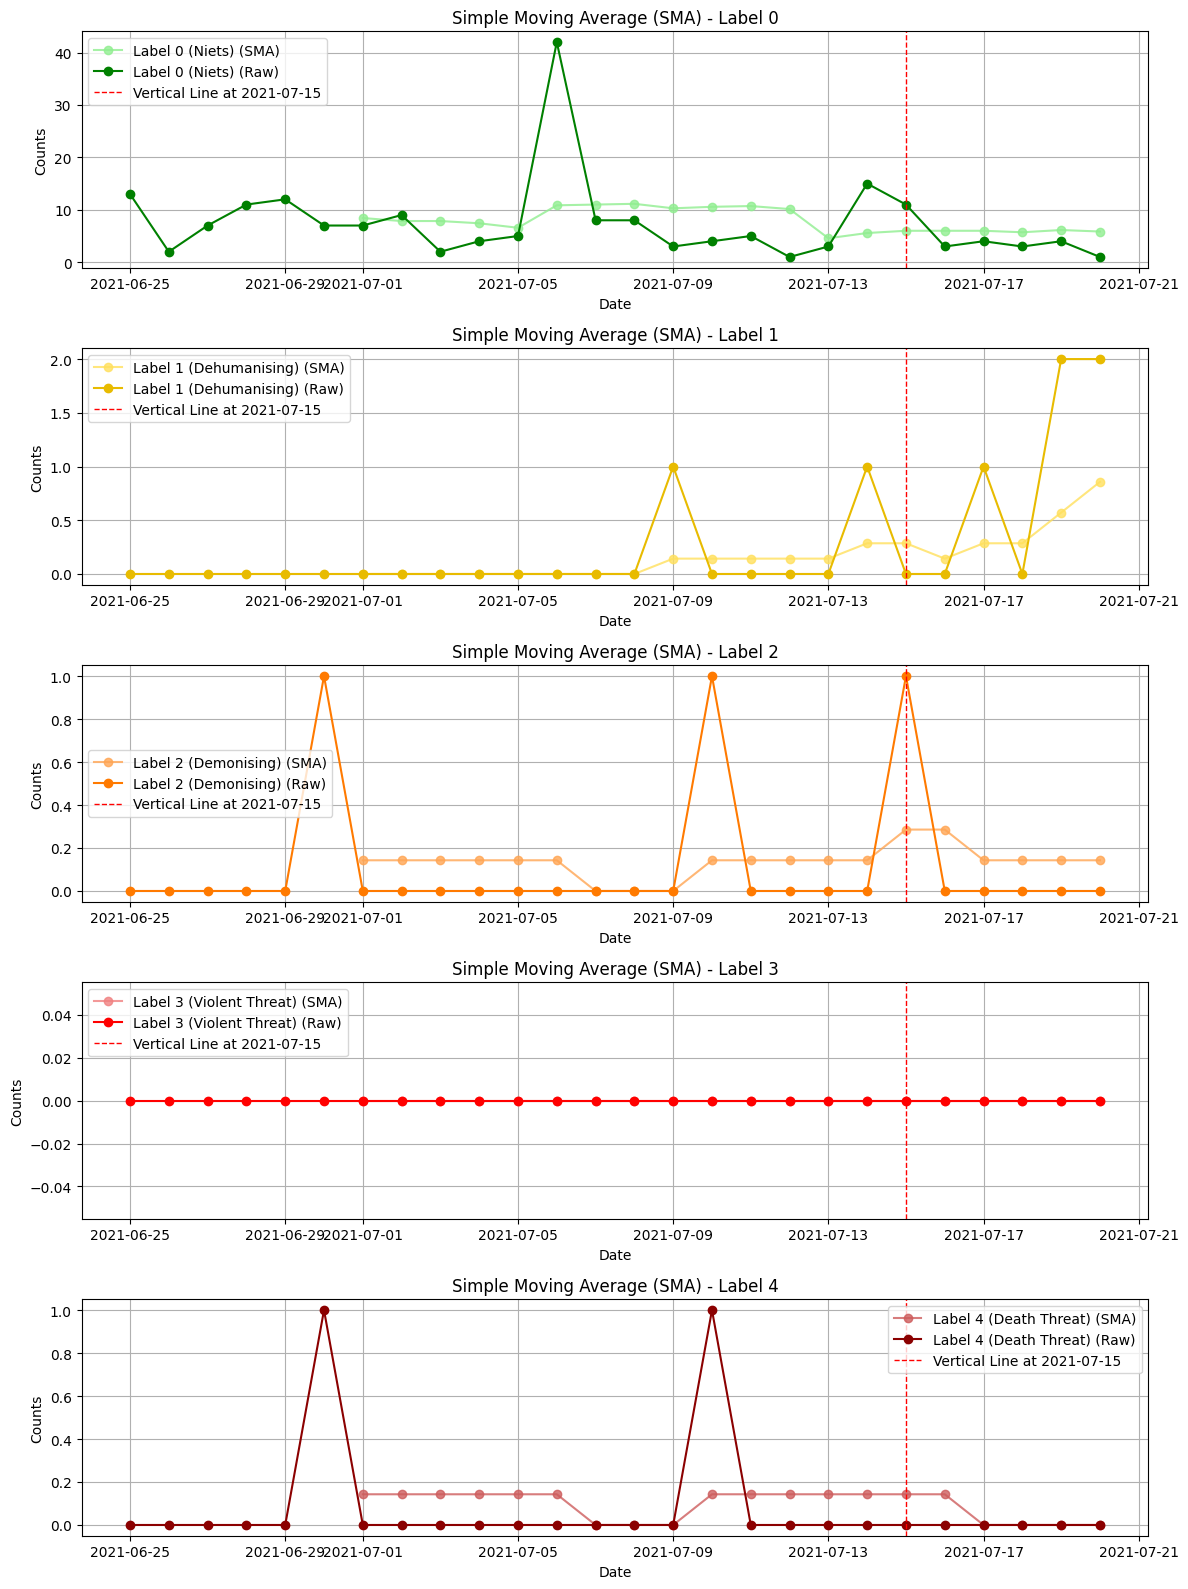

<Figure size 640x480 with 0 Axes>

In [ ]:
case_study(case_01_telegram, case_01_twitter, case_01_target_date, 1)

## Case 2


The following plots are from case 2. 
 The target date is 2022-01-05
tel values:  predicted_label
0    1759
2      41
3      31
1      25
4       4
Name: count, dtype: int64 total:  1860
twit values:  predicted_label
0    49861
2     1014
1      834
3      588
4       85
Name: count, dtype: int64 total:  52382
TWITTER
first the distribution over time for case 2 on twitter
second the sma plots over time for case 2 on twitter


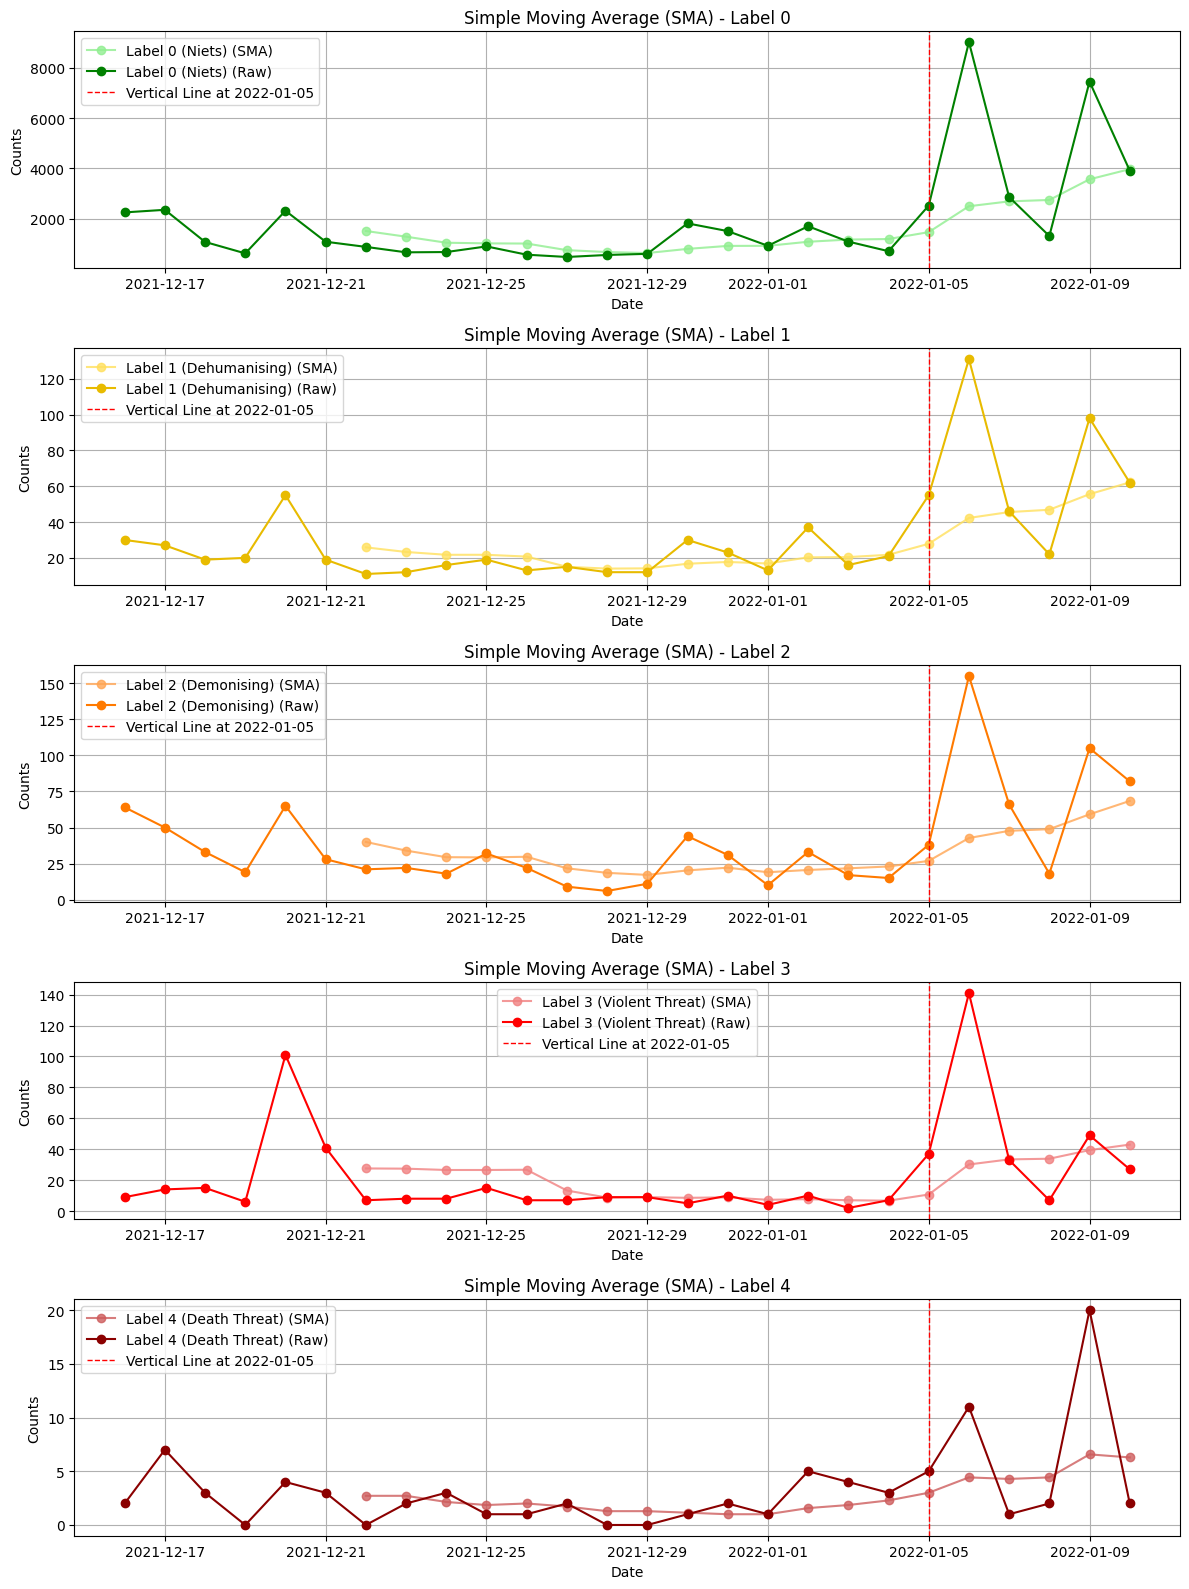

TELEGRAM
first the distribution over time for case 2 on telegram
second the sma plots over time for case 2 on telegram


<Figure size 640x480 with 0 Axes>

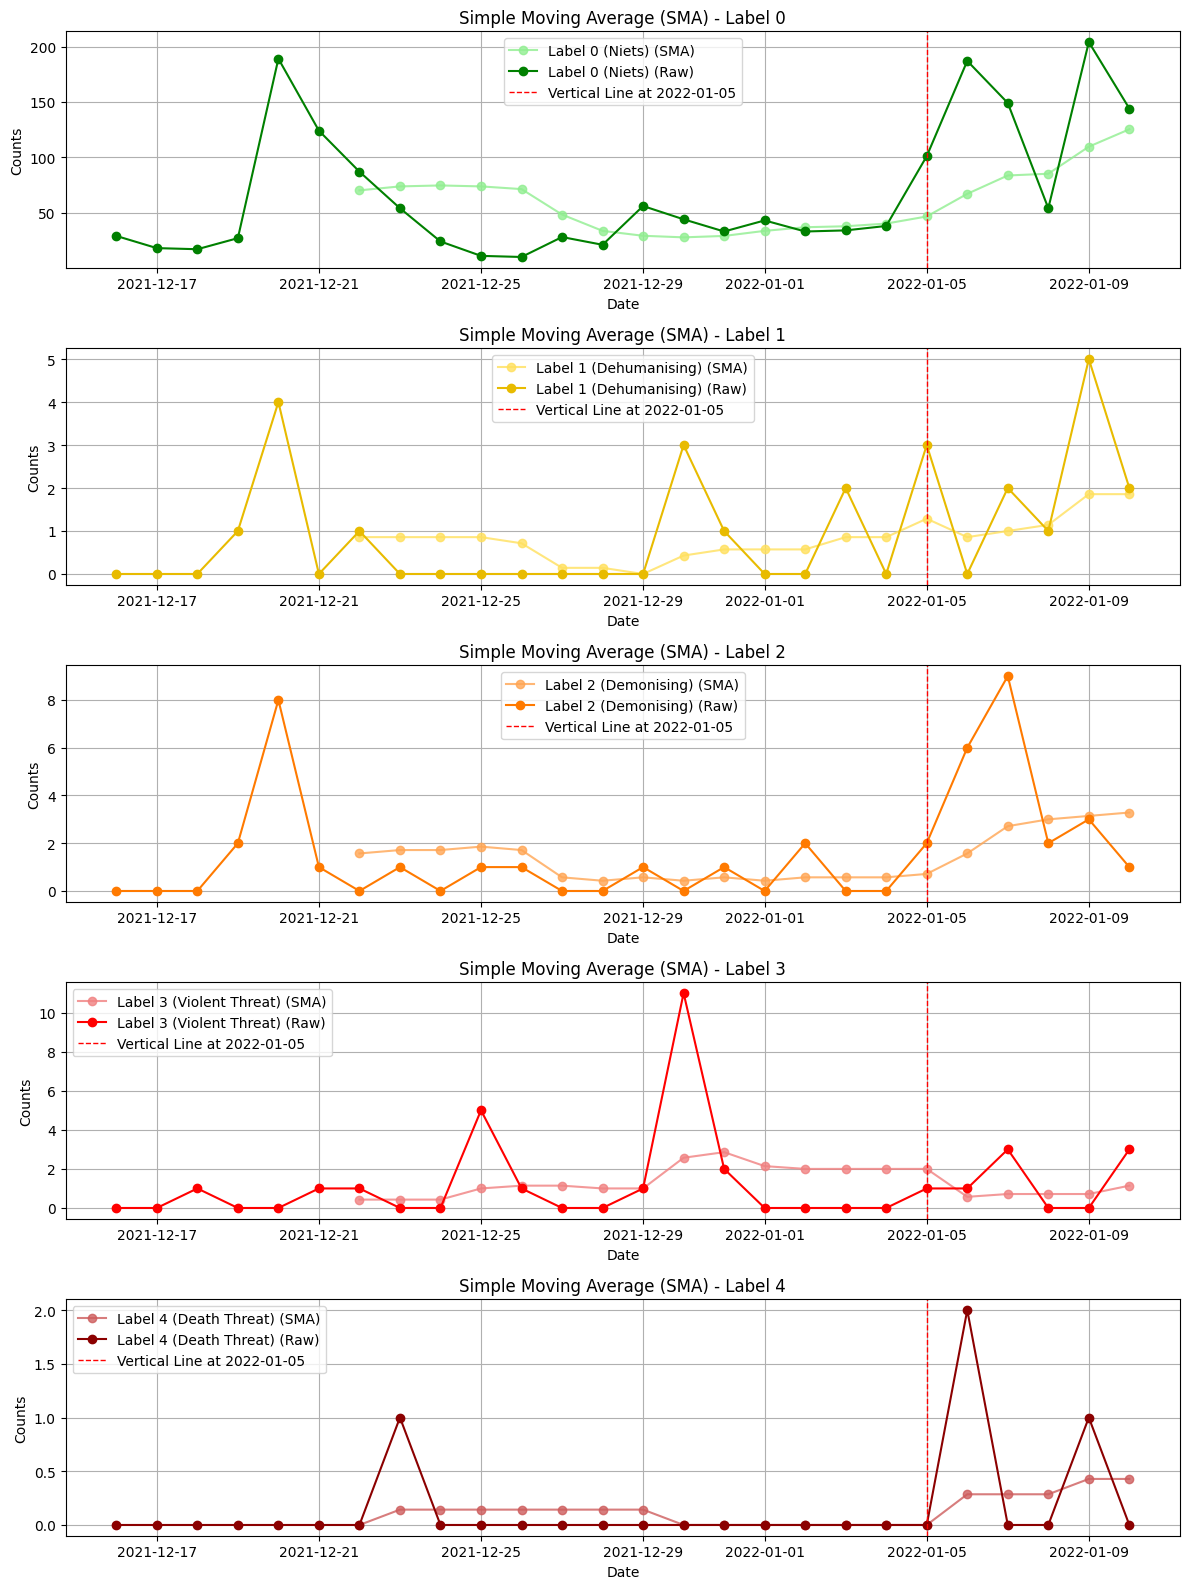

<Figure size 640x480 with 0 Axes>

In [ ]:
case_study(case_02_telegram, case_02_twitter, case_02_target_date, 2)

## Case 3

The following plots are from case 3. 
 The target date is 2022-07-06
tel values:  predicted_label
0    875
2     11
1     10
3     10
Name: count, dtype: int64 total:  906
twit values:  predicted_label
0    6428
1      82
2      63
3      52
4       5
Name: count, dtype: int64 total:  6630
TWITTER
first the distribution over time for case 3 on twitter
second the sma plots over time for case 3 on twitter


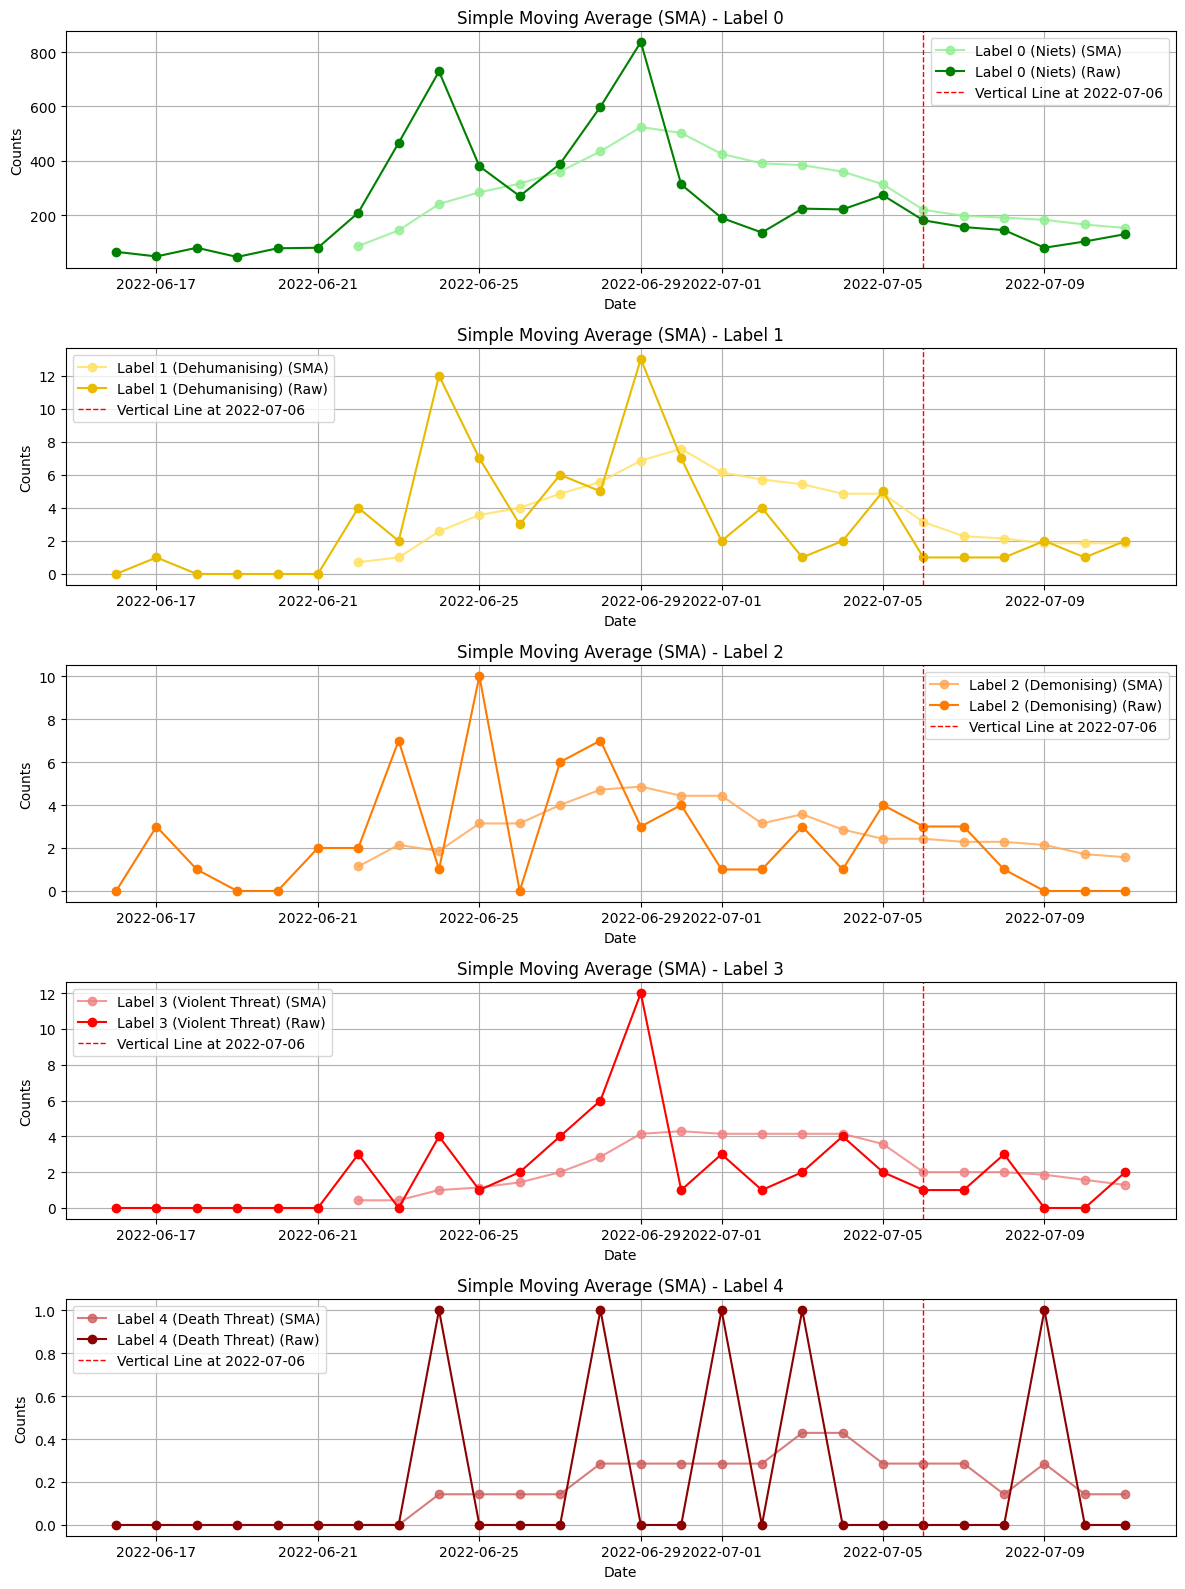

TELEGRAM
first the distribution over time for case 3 on telegram
second the sma plots over time for case 3 on telegram


<Figure size 640x480 with 0 Axes>

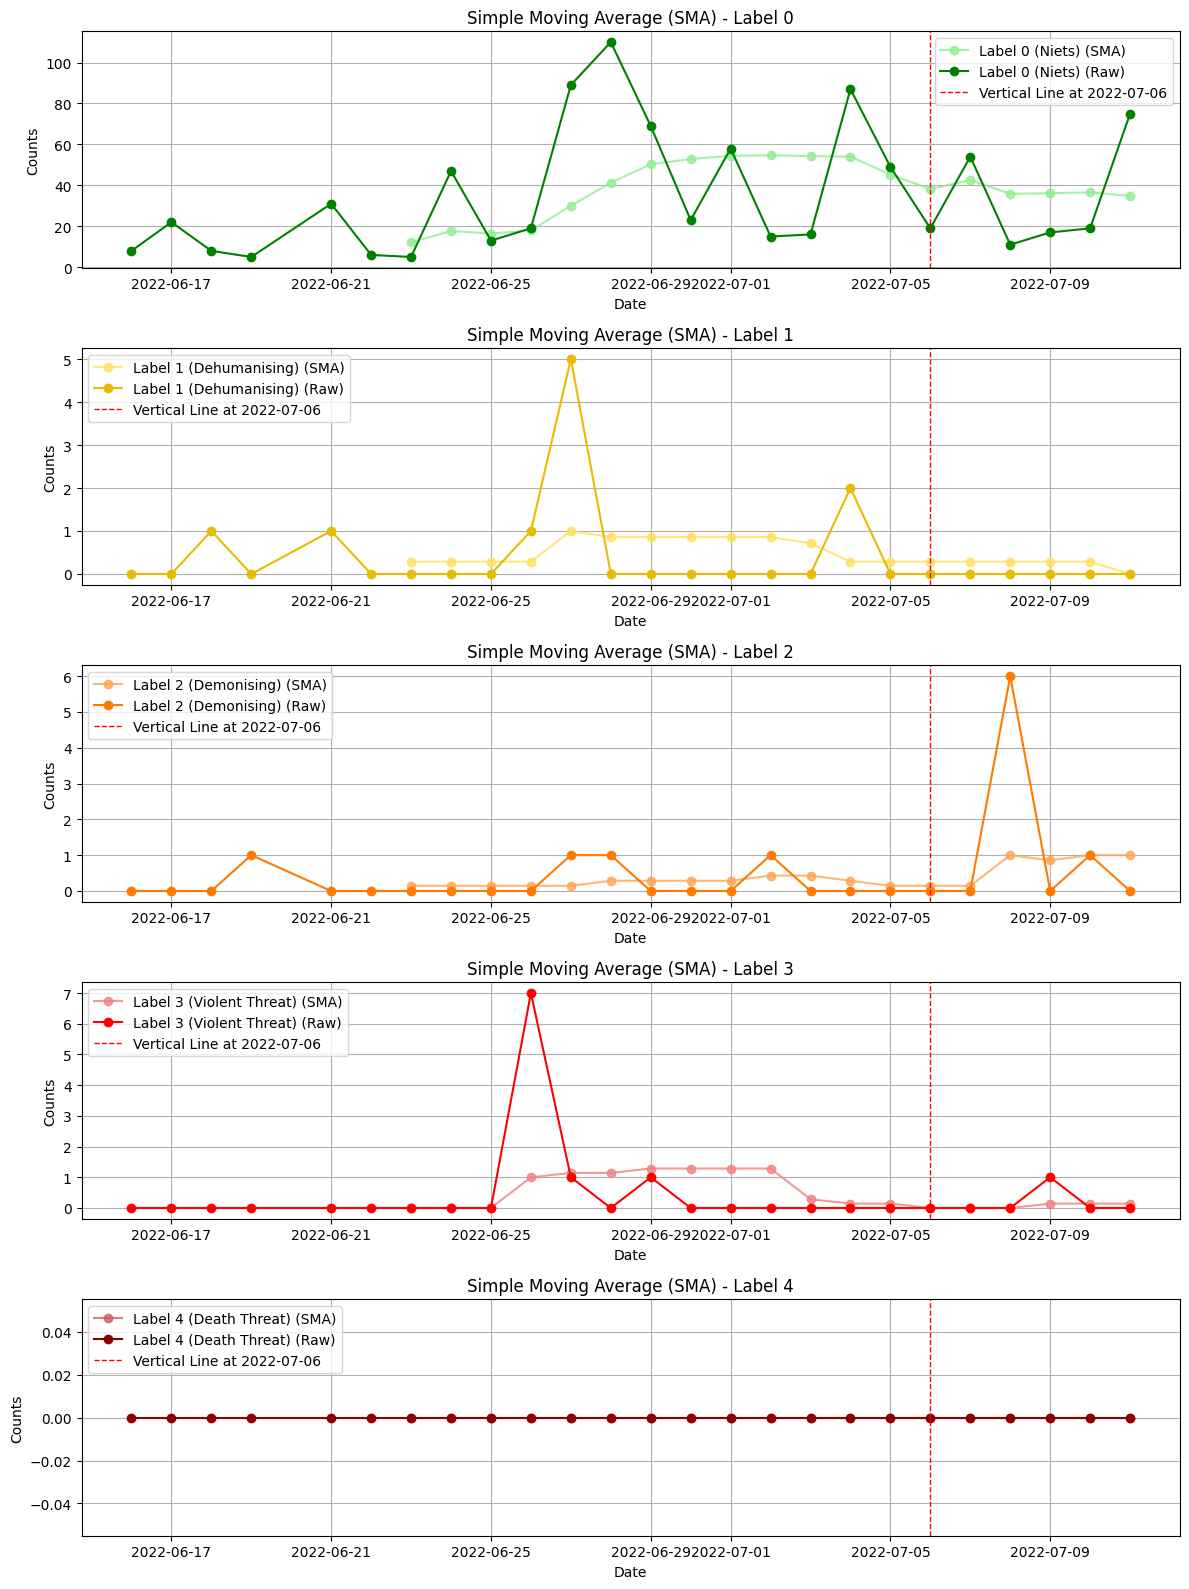

<Figure size 640x480 with 0 Axes>

In [ ]:
case_study(case_03_telegram, case_03_twitter, case_03_target_date, 3)

## Case 4

The following plots are from case 4. 
 The target date is 2022-06-15
tel values:  predicted_label
0    15
Name: count, dtype: int64 total:  15
twit values:  predicted_label
0    4716
1     102
3      55
2      28
4      26
Name: count, dtype: int64 total:  4927
TWITTER
first the distribution over time for case 4 on twitter
second the sma plots over time for case 4 on twitter


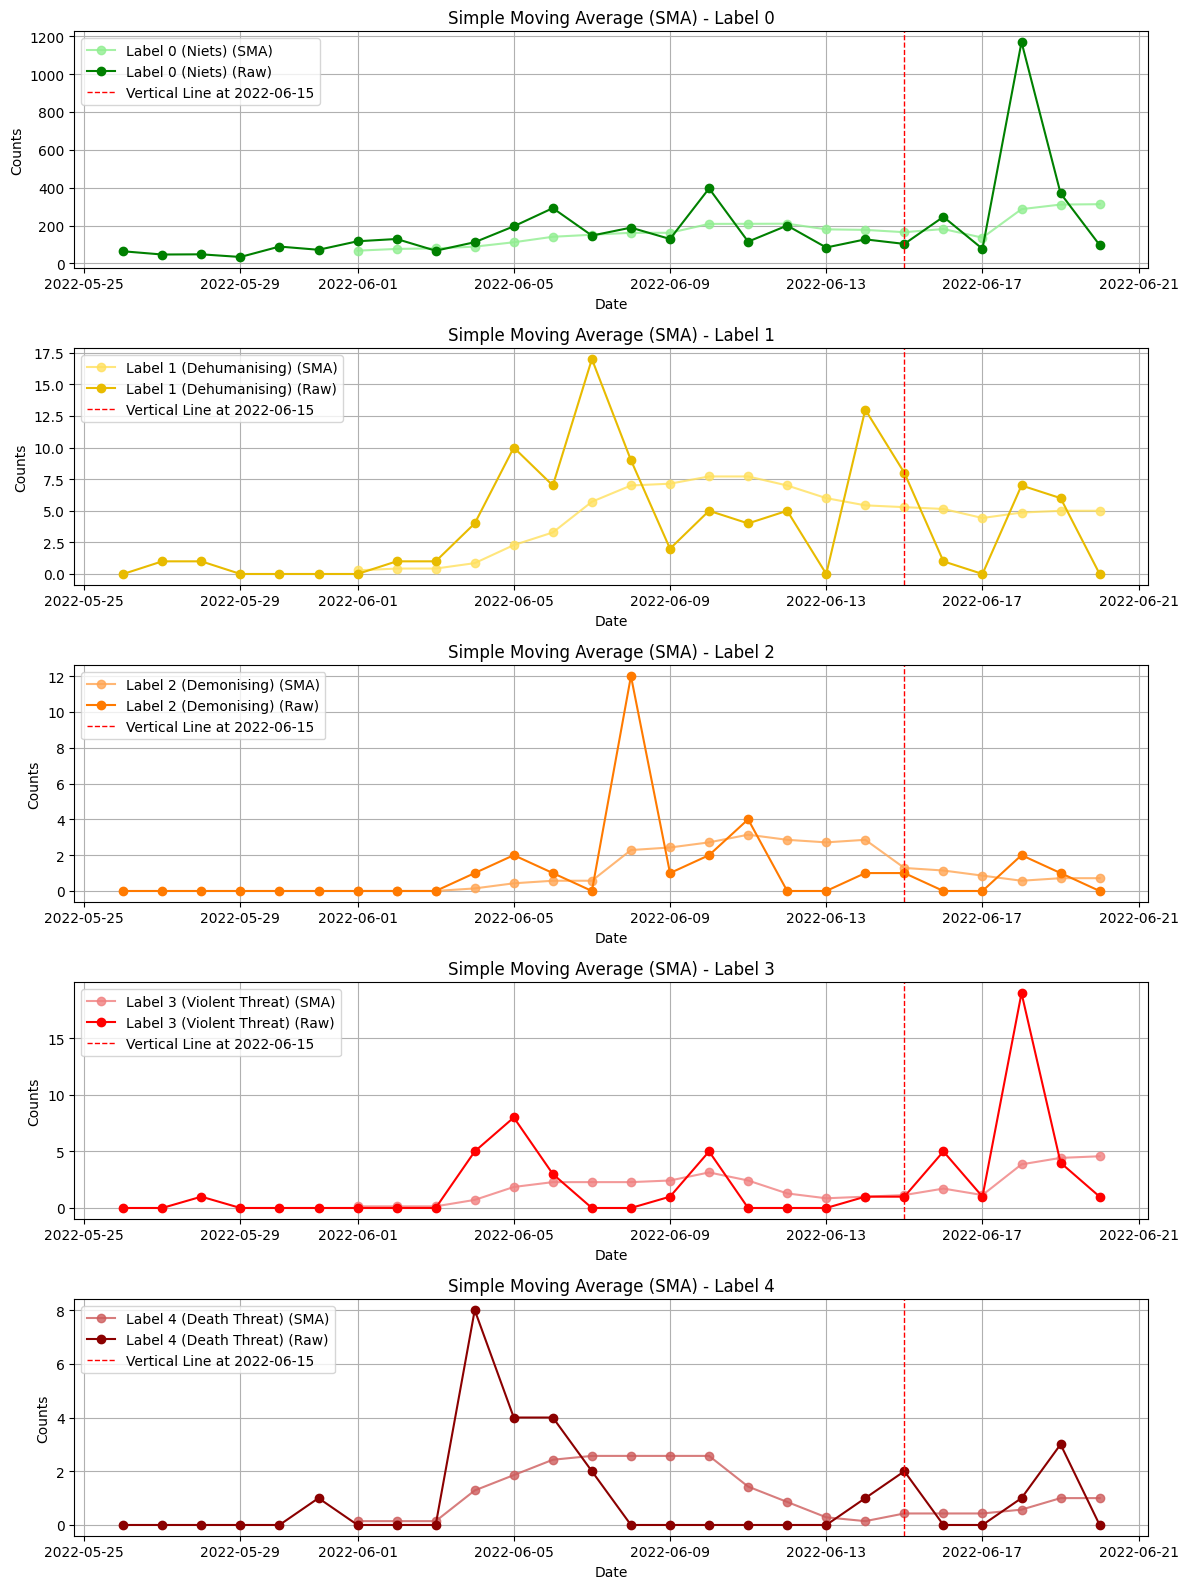

TELEGRAM
first the distribution over time for case 4 on telegram
second the sma plots over time for case 4 on telegram


<Figure size 640x480 with 0 Axes>

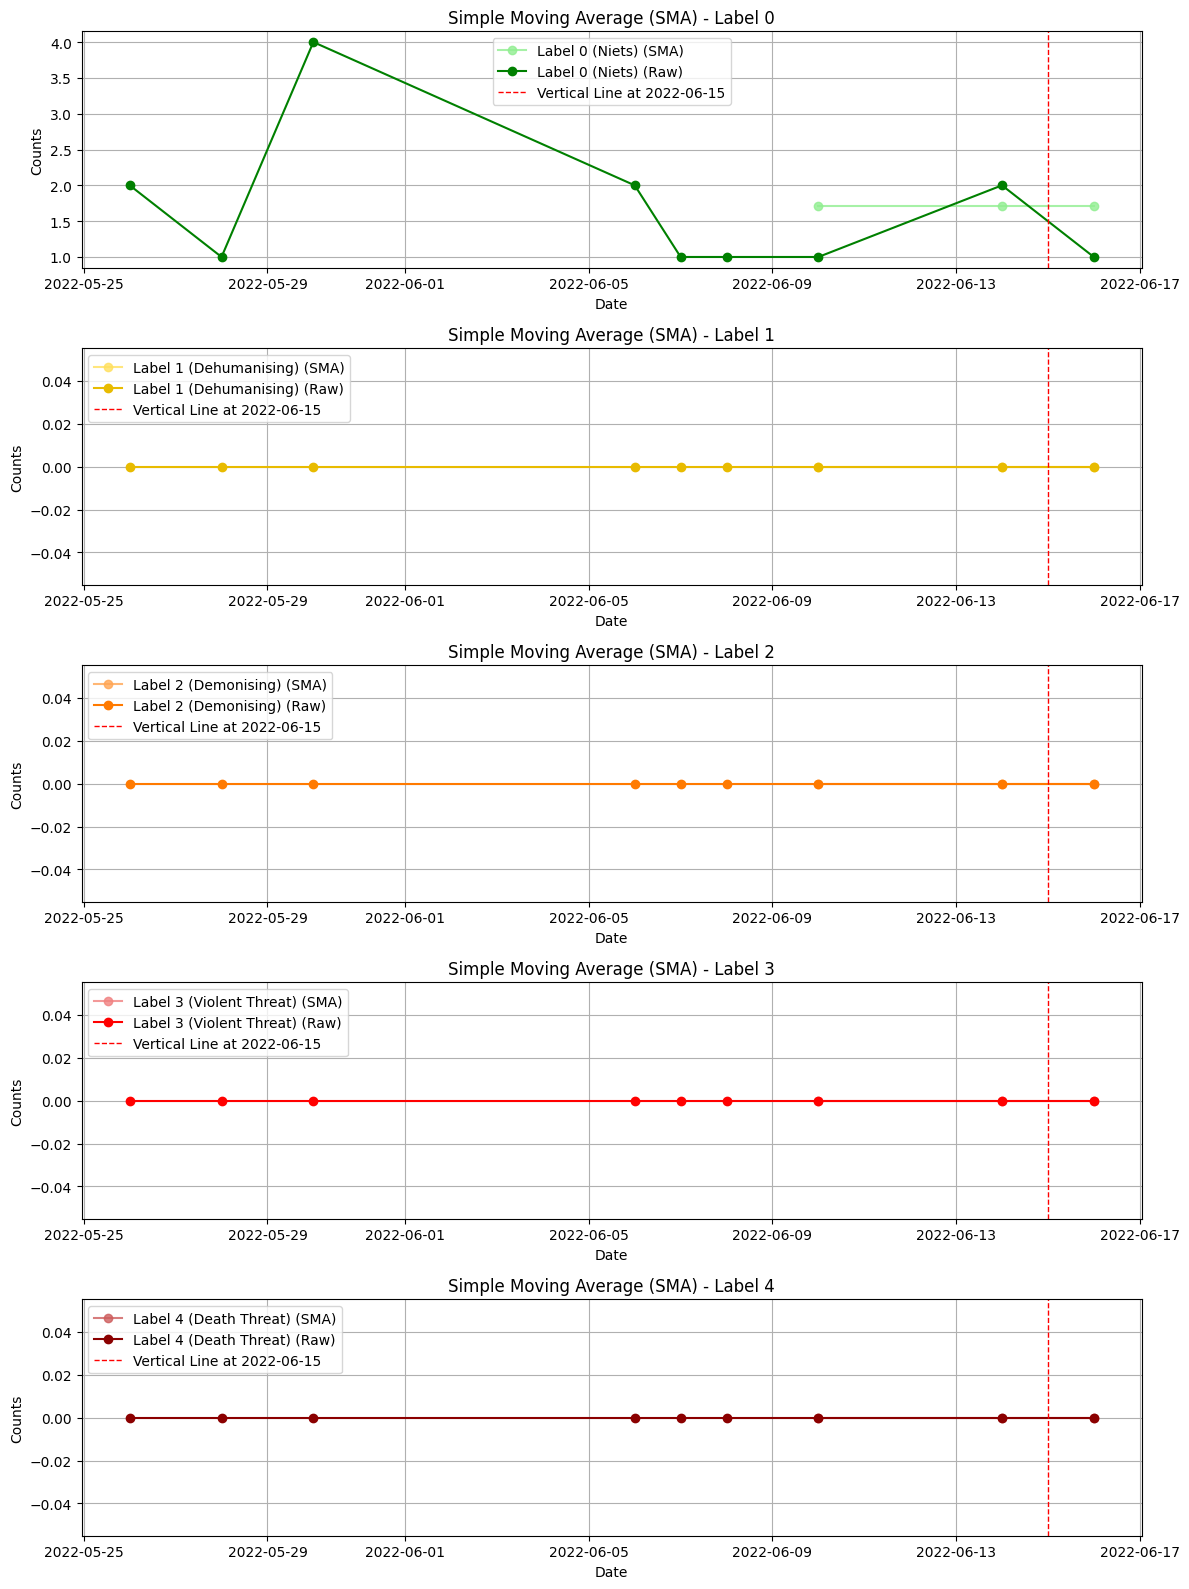

<Figure size 640x480 with 0 Axes>

In [ ]:
case_study(case_04_telegram, case_04_twitter, case_04_target_date, 4)

## Case 5

The following plots are from case 5. 
 The target date is 2021-11-02
tel values:  predicted_label
0    44
4     2
2     1
Name: count, dtype: int64 total:  47
twit values:  predicted_label
0    63924
1      689
2      394
3      313
4      118
Name: count, dtype: int64 total:  65438
TWITTER
first the distribution over time for case 5 on twitter
second the sma plots over time for case 5 on twitter


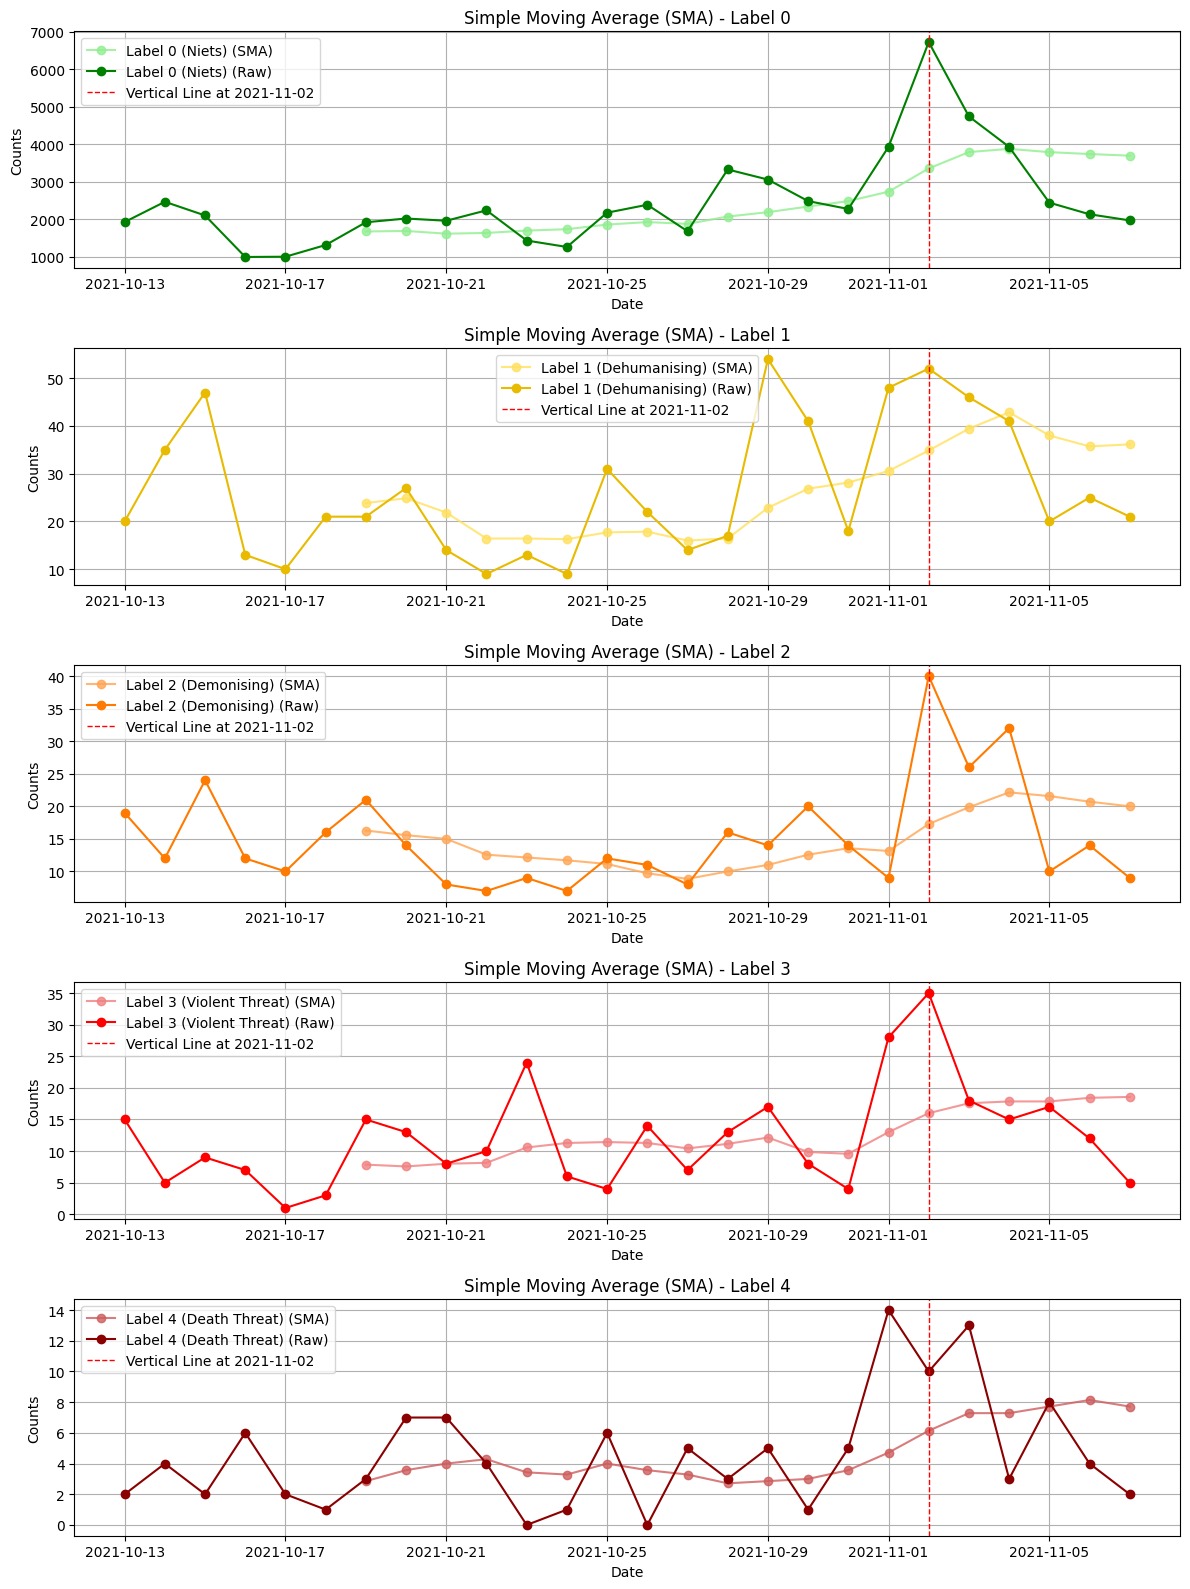

TELEGRAM
first the distribution over time for case 5 on telegram
second the sma plots over time for case 5 on telegram


<Figure size 640x480 with 0 Axes>

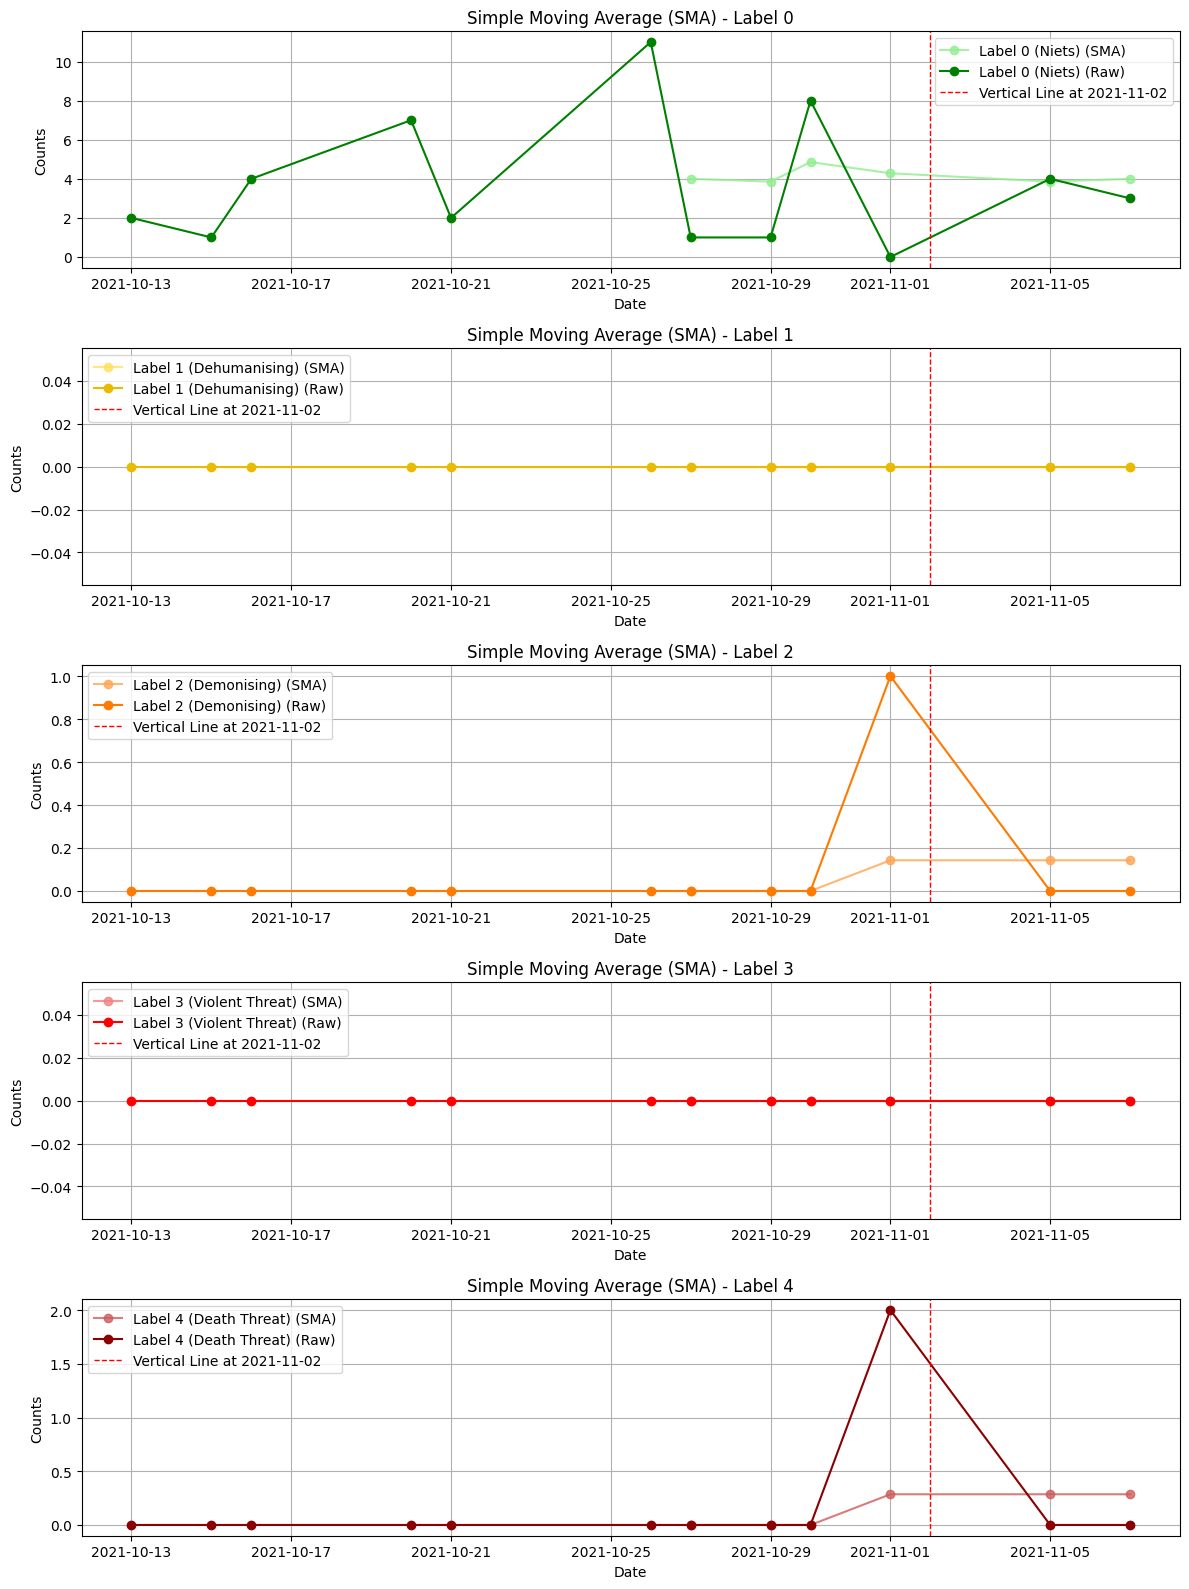

<Figure size 640x480 with 0 Axes>

In [ ]:
case_study(case_05_telegram, case_05_twitter, case_05_target_date, 5)

## Case 6

The following plots are from case 6. 
 The target date is 2021-11-21
tel values:  predicted_label
0    28
Name: count, dtype: int64 total:  28
twit values:  predicted_label
0    75969
3      728
1      704
2      433
4      123
Name: count, dtype: int64 total:  77957
TWITTER
first the distribution over time for case 6 on twitter
second the sma plots over time for case 6 on twitter


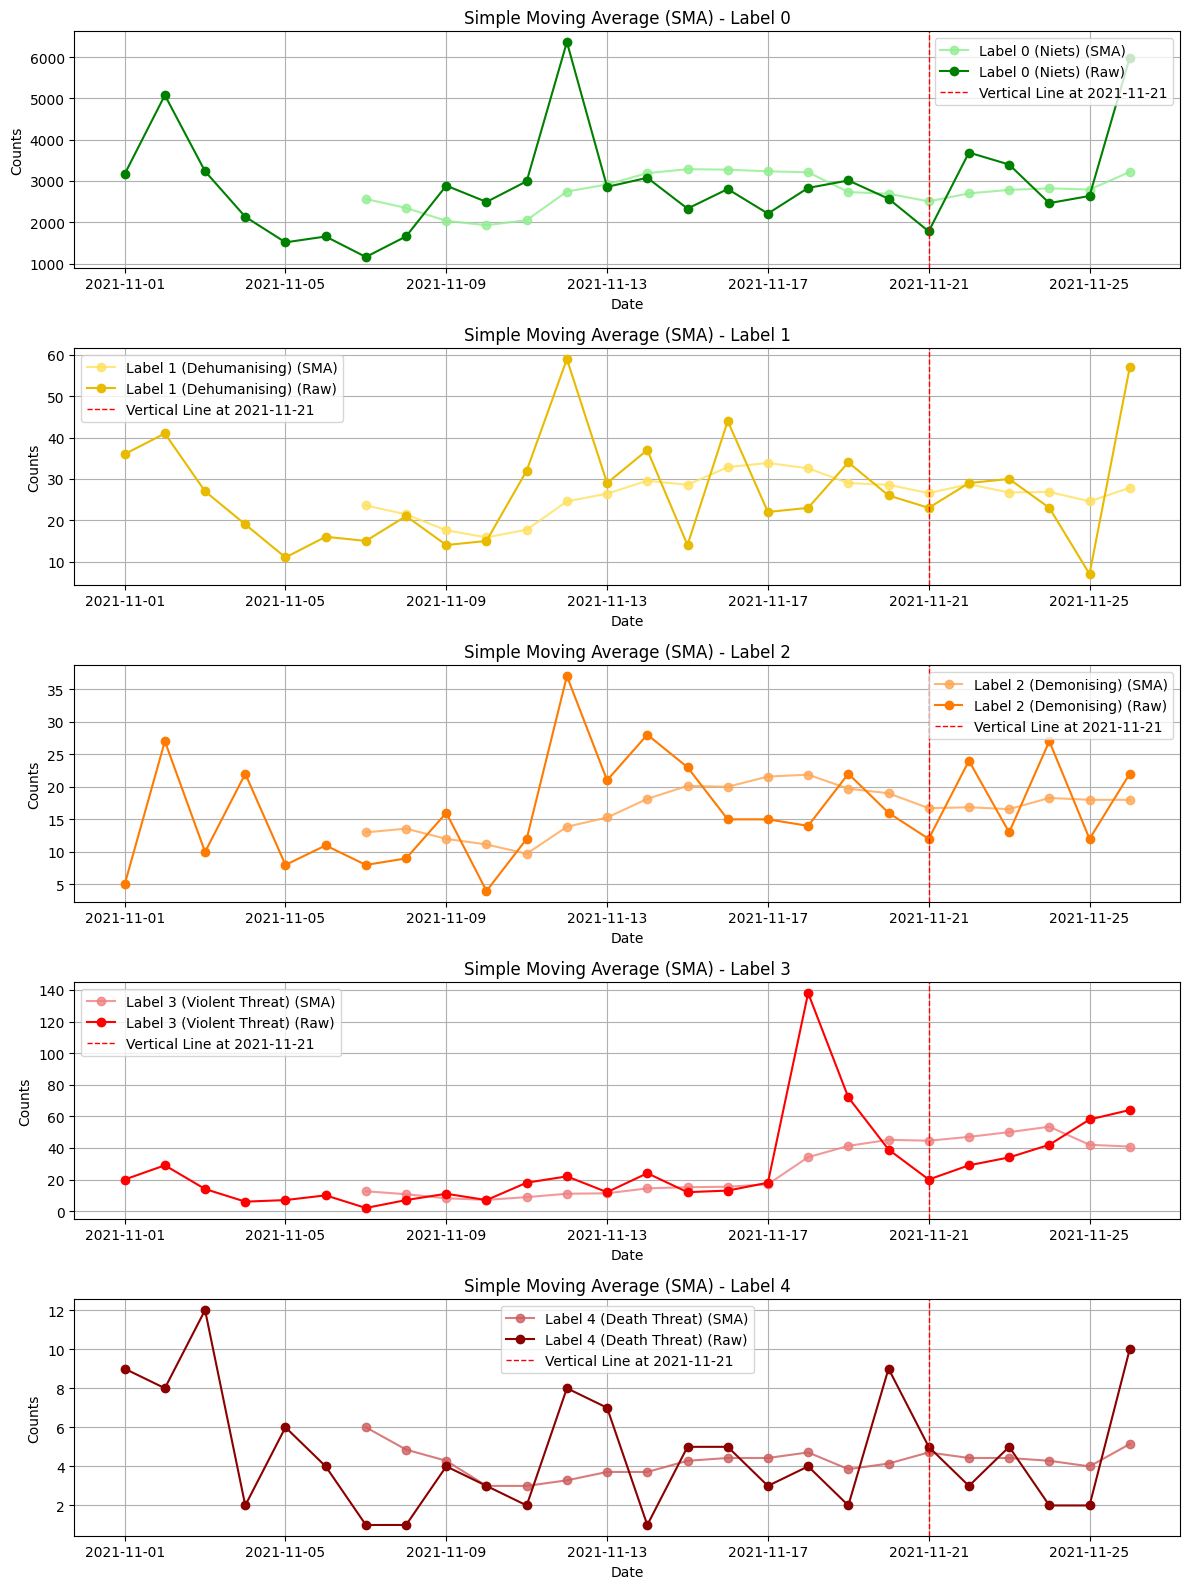

TELEGRAM
first the distribution over time for case 6 on telegram
second the sma plots over time for case 6 on telegram


ValueError: x and y must have same first dimension, but have shapes (0,) and (2,)

<Figure size 640x480 with 0 Axes>

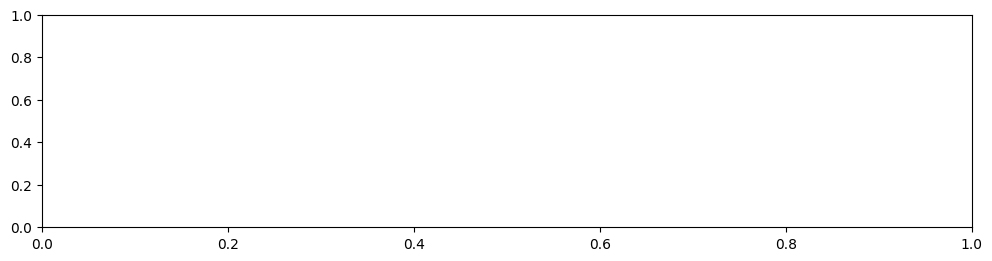

In [ ]:
case_study(case_06_telegram, case_06_twitter, case_06_target_date, 6)

## Case 7

The following plots are from case 7. 
 The target date is 2021-01-10
tel values:  predicted_label
0    1
Name: count, dtype: int64 total:  1
twit values:  predicted_label
0    10781
2       85
1       62
3       33
4       11
Name: count, dtype: int64 total:  10972
TWITTER
first the distribution over time for case 7 on twitter
second the sma plots over time for case 7 on twitter


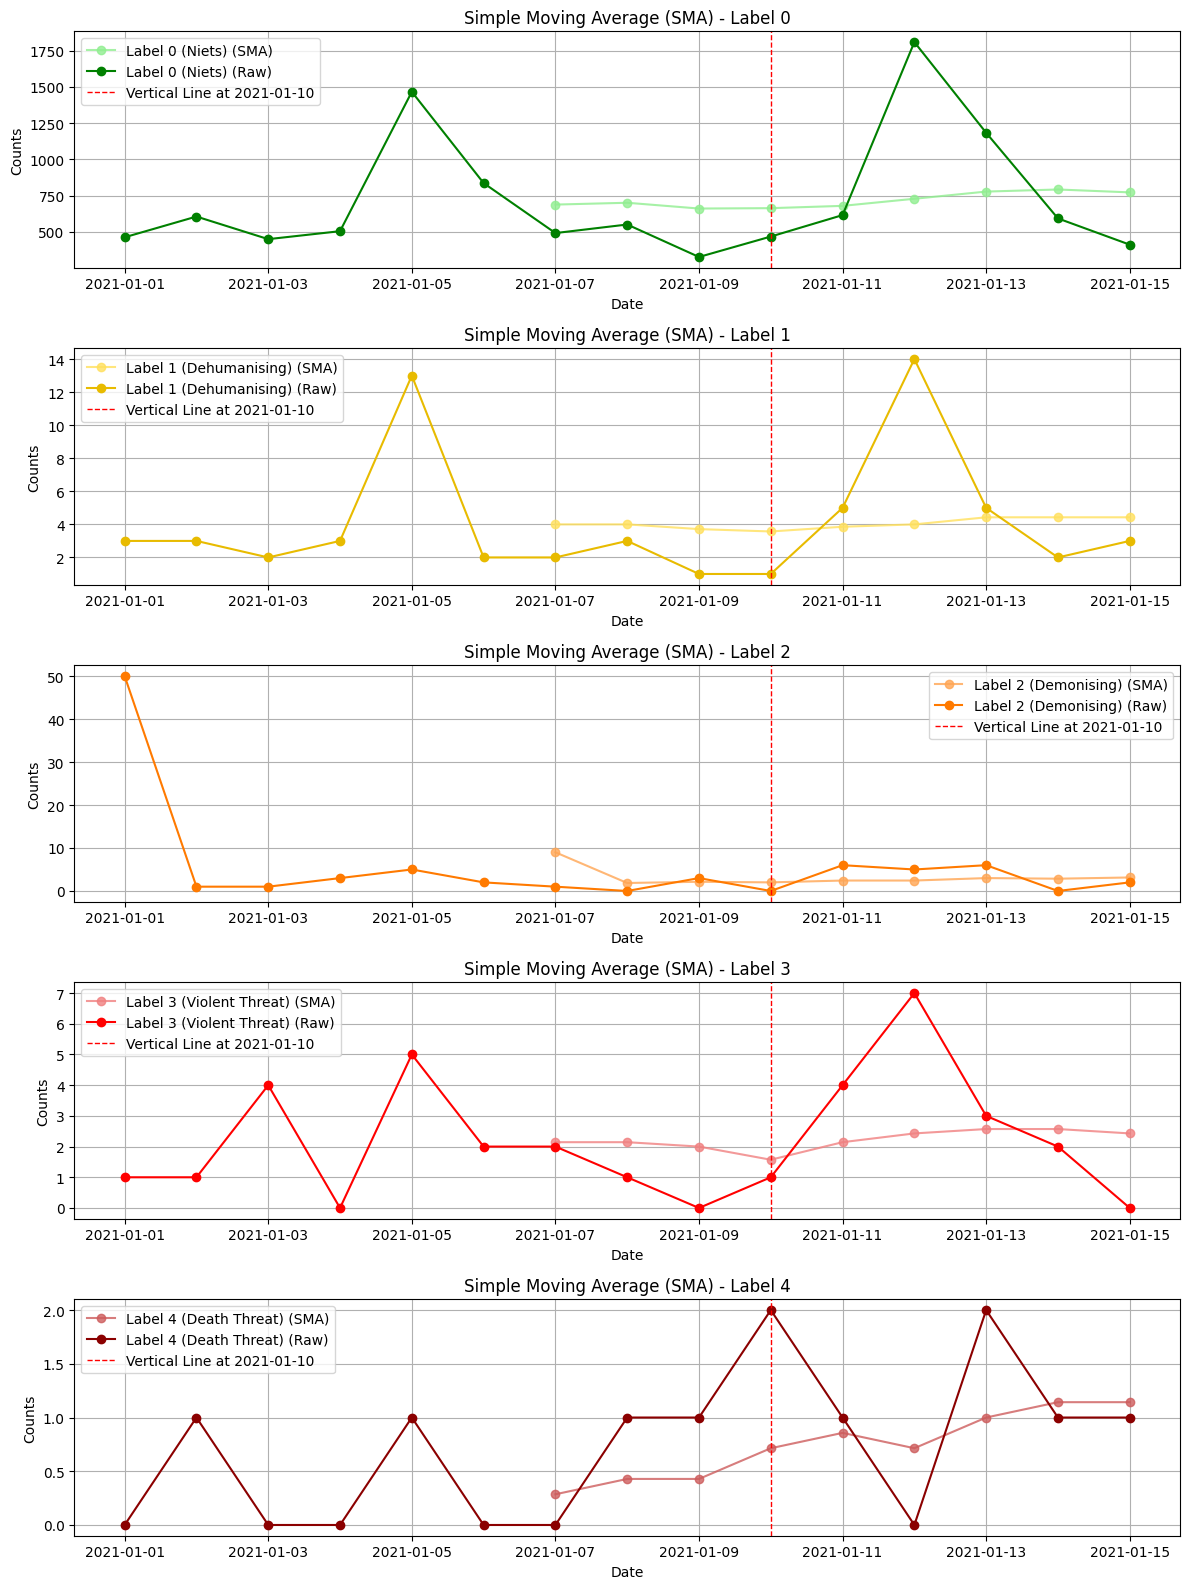

TELEGRAM
first the distribution over time for case 7 on telegram
second the sma plots over time for case 7 on telegram


ValueError: x and y must have same first dimension, but have shapes (0,) and (7,)

<Figure size 640x480 with 0 Axes>

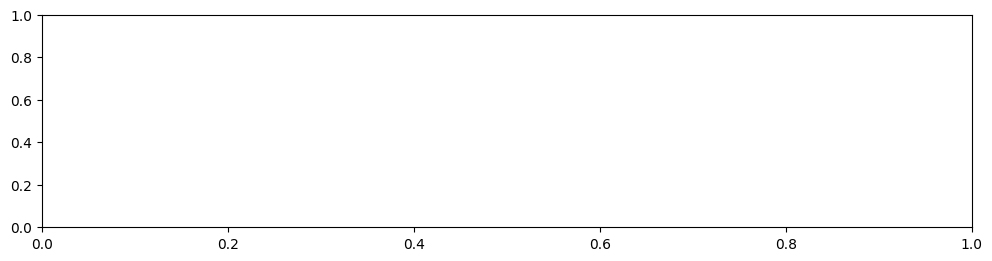

In [ ]:
case_study(case_07_telegram, case_07_twitter, case_07_target_date, 7)

## Case 8

The following plots are from case 8. 
 The target date is 2021-05-15
tel values:  predicted_label
0    3
Name: count, dtype: int64 total:  3
twit values:  predicted_label
0    51093
1      545
3      276
2      250
4       68
Name: count, dtype: int64 total:  52232
TWITTER
first the distribution over time for case 8 on twitter
second the sma plots over time for case 8 on twitter


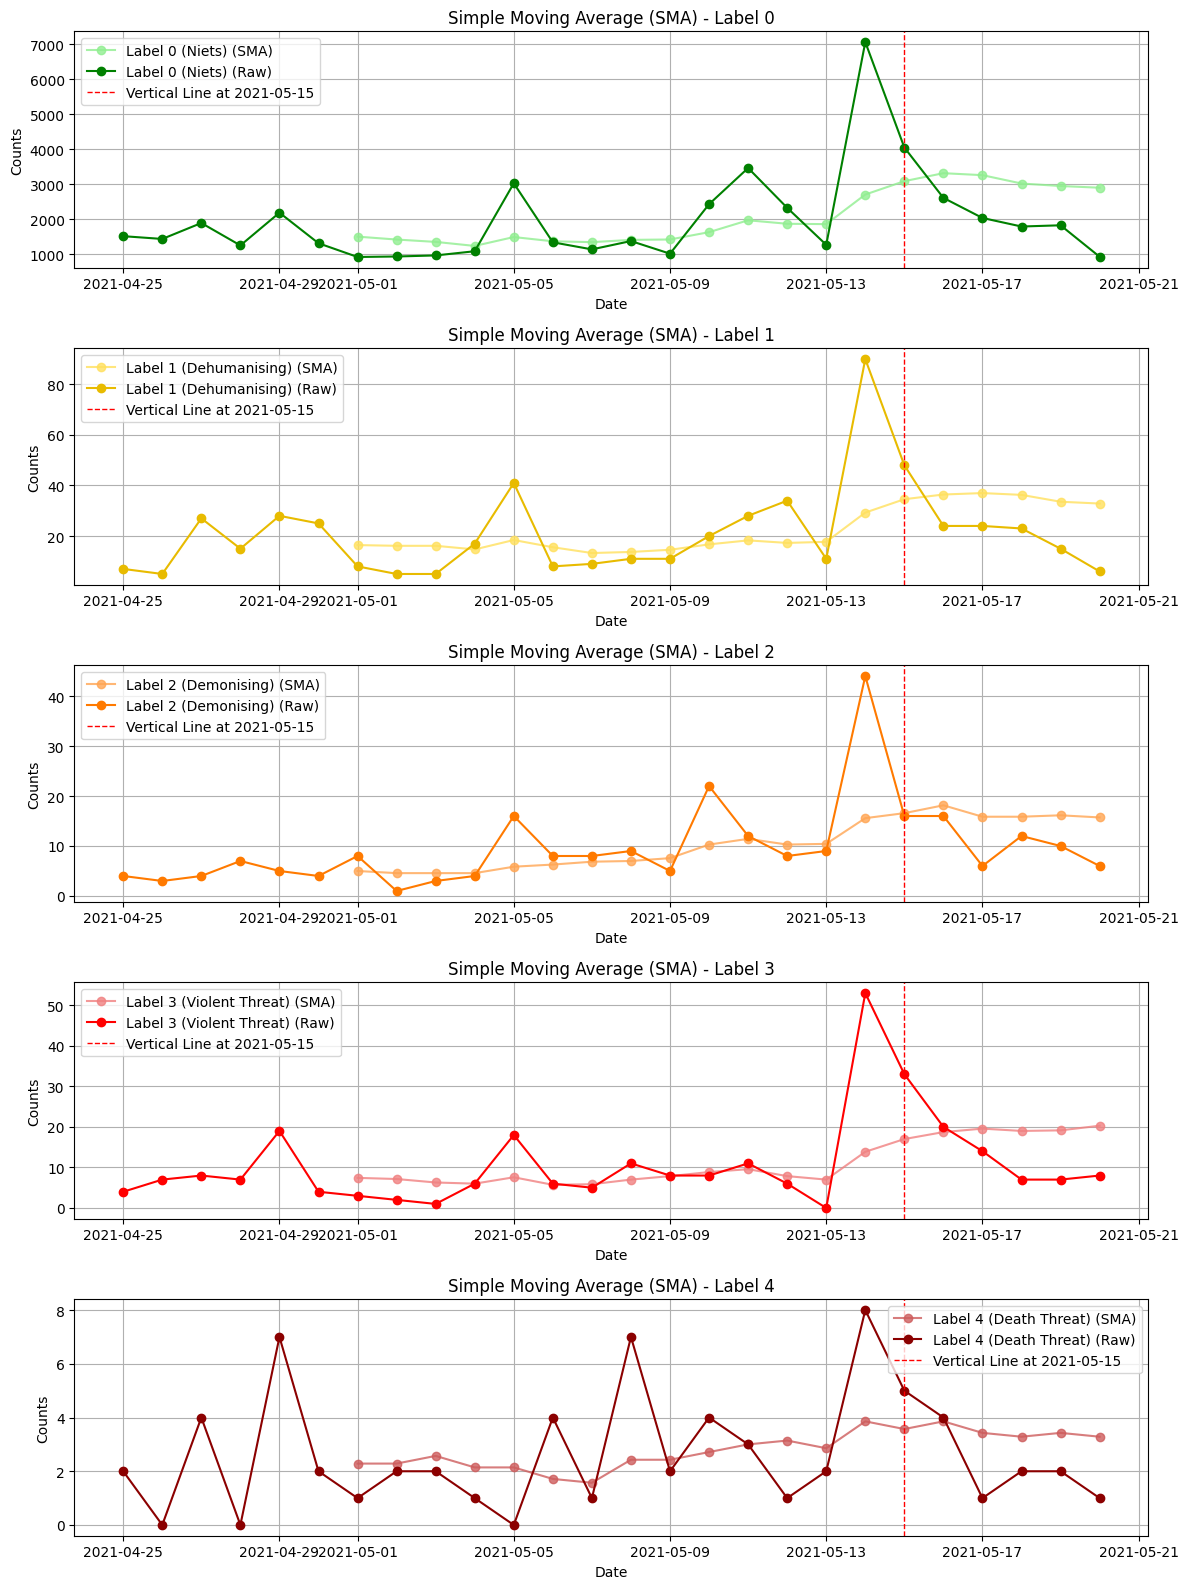

TELEGRAM
first the distribution over time for case 8 on telegram
second the sma plots over time for case 8 on telegram


ValueError: x and y must have same first dimension, but have shapes (0,) and (6,)

<Figure size 640x480 with 0 Axes>

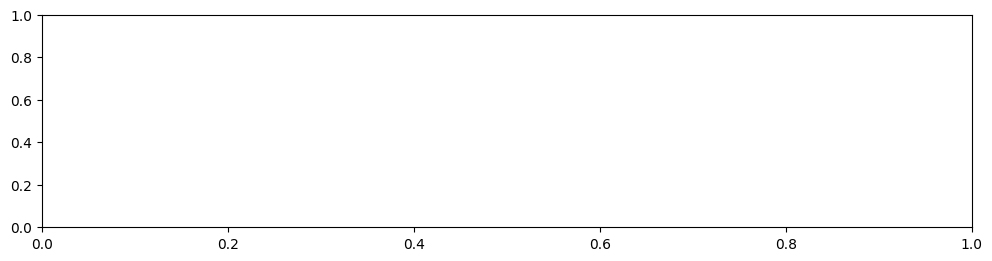

In [ ]:
case_study(case_08_telegram, case_08_twitter, case_08_target_date, 8)